In [1]:

import numpy as np 

import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-07-16 10:55:04.949783

NumPy version: 2.2.2
pandas version: 2.2.3
matplotlib version: 3.10.0
Scikit-Learn version: 1.6.1


In [2]:
df = pd.read_csv("Heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
x = df.drop("target", axis=1)

y = df["target"]

x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y.head(), y.value_counts()

(0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

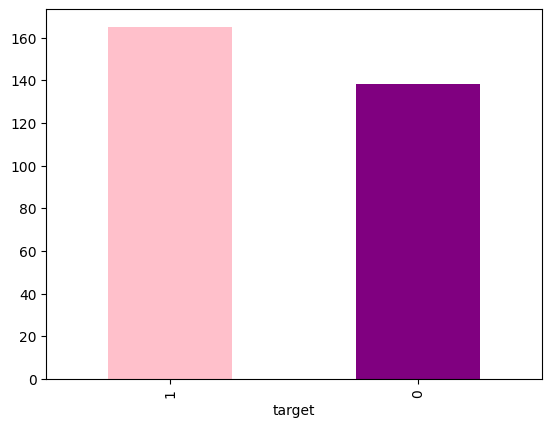

In [5]:
df.target.value_counts().plot(kind='bar', color = ["pink", "purple"] );

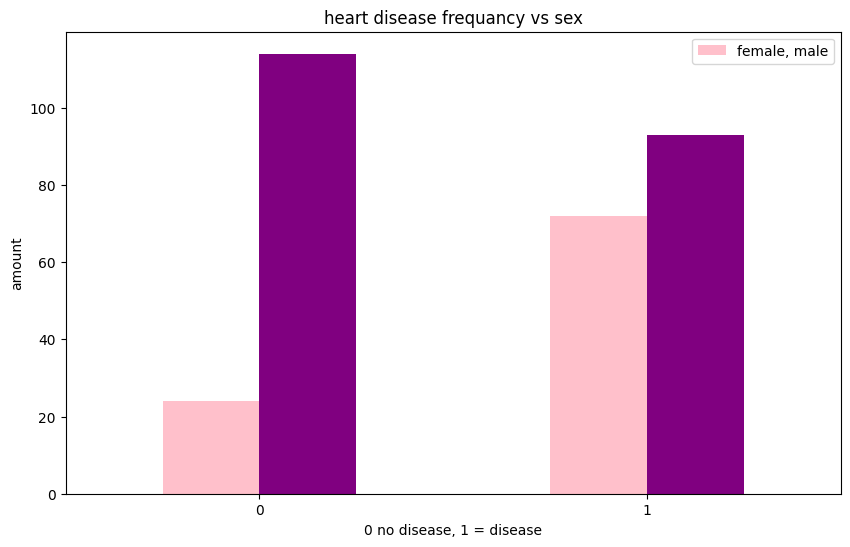

In [6]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["pink", "purple"])

plt.title("heart disease frequancy vs sex")
plt.xlabel("0 no disease, 1 = disease")
plt.ylabel("amount")
plt.legend({"female, male"})
plt.xticks(rotation = 0);

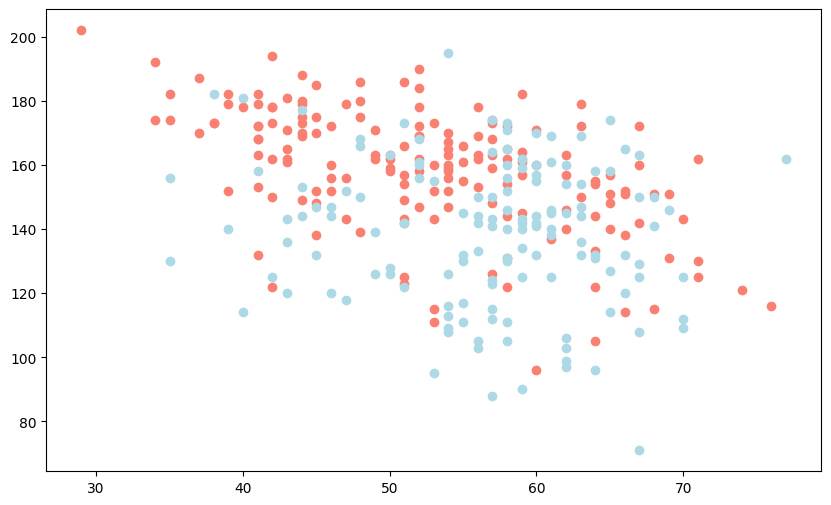

In [7]:
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

<Axes: ylabel='Frequency'>

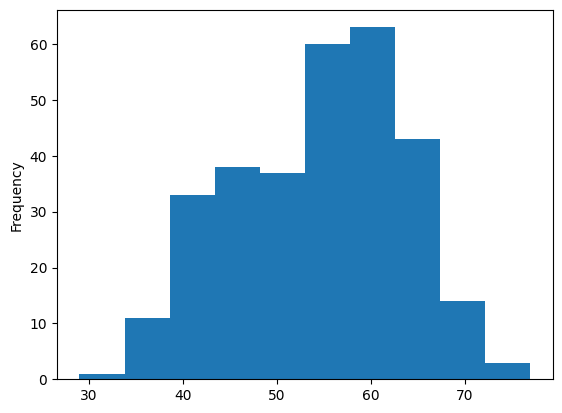

In [8]:
df.age.plot.hist()

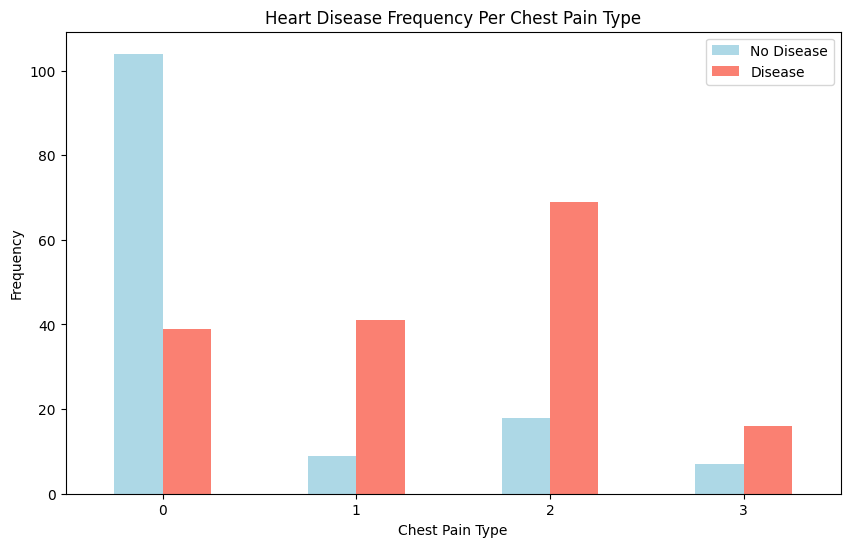

In [9]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);


In [10]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

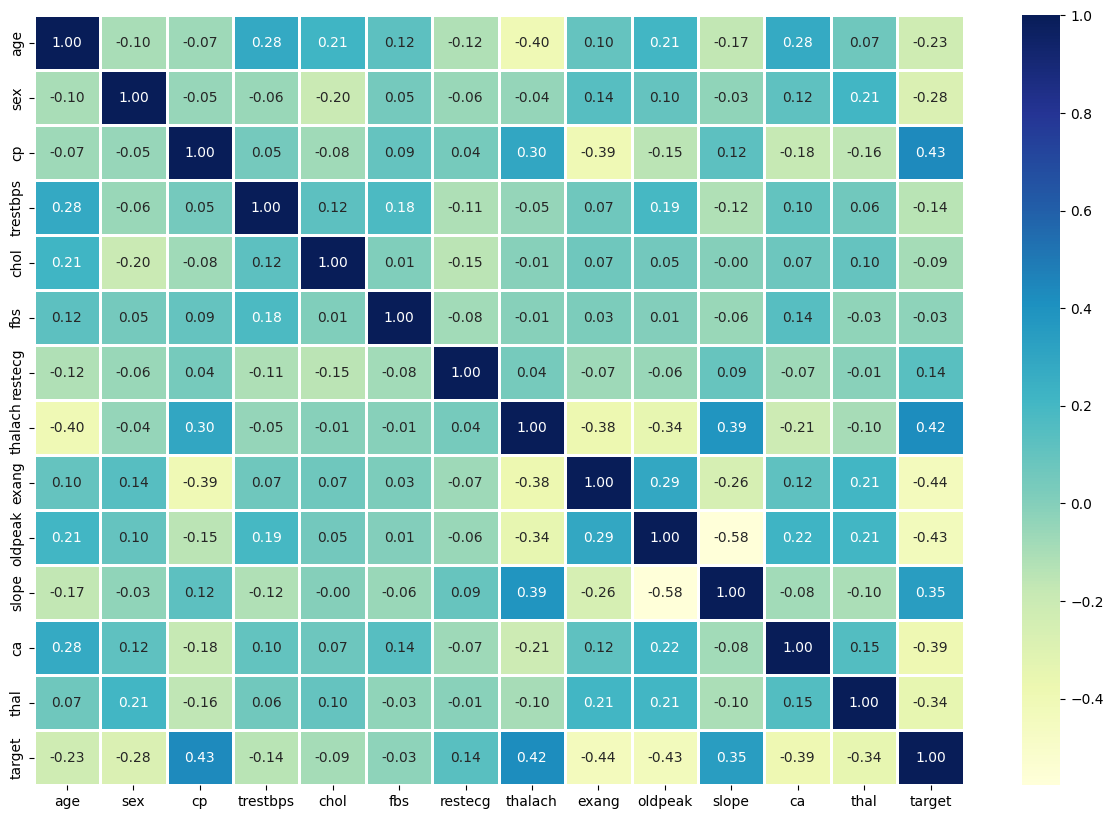

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot= True, linewidths=0.9, fmt = ".2f", cmap= "YlGnBu")

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [14]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [16]:
y_preds = clf.predict(x_test)

In [17]:
y_preds 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0])

In [18]:
train_acc = clf.score(x_train, y_train)
print({train_acc*100})

{100.0}


In [19]:
test_acc = clf.score(x_test, y_test)
print({test_acc*100})

{88.52459016393442}


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.84      1.00      0.91        37

    accuracy                           0.89        61
   macro avg       0.92      0.85      0.87        61
weighted avg       0.90      0.89      0.88        61



In [22]:
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[17,  7],
       [ 0, 37]])

In [23]:
accuracy_score(y_test, y_preds)

0.8852459016393442

In [24]:
np.random.seed(42)
for i in range(100, 200, 10):
    print(i)
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(model.score(x_test, y_test))
    print("")

100
0.8852459016393442

110
0.8524590163934426

120
0.8688524590163934

130
0.8688524590163934

140
0.8852459016393442

150
0.8852459016393442

160
0.9016393442622951

170
0.8852459016393442

180
0.9016393442622951

190
0.8852459016393442



In [25]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)
for i in range(100, 200, 10):
    print(i)
    model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    
    model_score = model.score(x_test, y_test)
    print({model_score*100})
    
    cross_val_mean = np.mean(cross_val_score(model, x, y, cv=5))
    print({cross_val_mean*100})
    
    print("")

100
{88.52459016393442}
{np.float64(82.14754098360656)}

110
{90.1639344262295}
{np.float64(81.16939890710381)}

120
{81.9672131147541}
{np.float64(83.1584699453552)}

130
{90.1639344262295}
{np.float64(83.14207650273224)}

140
{85.24590163934425}
{np.float64(82.48087431693989)}

150
{90.1639344262295}
{np.float64(80.17486338797815)}

160
{88.52459016393442}
{np.float64(80.83060109289617)}

170
{90.1639344262295}
{np.float64(81.82513661202184)}

180
{90.1639344262295}
{np.float64(81.49726775956283)}

190
{85.24590163934425}
{np.float64(81.83060109289617)}



In [26]:
np.random.seed(40)
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [i for i in range(100, 200, 10)]}
grid = GridSearchCV(estimator= RandomForestClassifier(), param_grid= param_grid, cv= 5, verbose=1)
grid.fit(x, y)

print(grid.best_params_)
print(grid.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 170}
0.8314754098360655


In [27]:
clf = grid.best_estimator_
clf



RandomForestClassifier(n_estimators=170)

In [28]:
clf = clf.fit(x_train, y_train)
print(f"Best model score split of the data: {clf.score(x_test, y_test)*100:.2f}%")

Best model score split of the data: 88.52%


In [29]:
import  pickle

pickle.dump(model, open("random_forest_model_1.pk1", "wb"))

In [30]:
loaded_pickle_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
print(f"loaded pickle model prediction score: {loaded_pickle_model.score(x_test, y_test)*100:.2f}%")

loaded pickle model prediction score: 85.25%


In [31]:
from joblib import dump, load
dump(model, "random_forest_model_1.joblib")

['random_forest_model_1.joblib']

In [32]:
loaded_joblib_model = load("random_forest_model_1.joblib")
#print(f"loaded joblib model prediction score: {loaded_joblib_model(x_test, y_test)*100:.2f}%")

In [33]:
# Put models in a dictionary
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(max_iter=100), # Note: if you see a warning about "convergence not reached", you can increase `max_iter` until convergence is reached
          "Random Forest": RandomForestClassifier()}
# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
# Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [34]:
#model_score = fit_and_score(models= models, x_train = x_train, x_test = x_test, y_train= y_train, y_test =y_test)
#model_score

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

c:\Users\Ala\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7868852459016393,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.8852459016393442}

<Axes: >

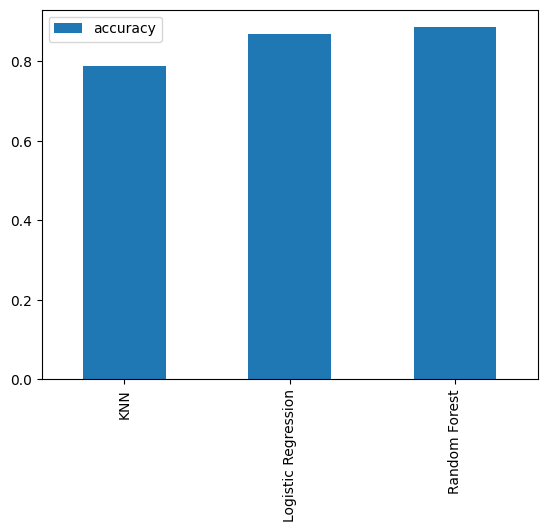

In [35]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

In [36]:
# Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()
# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))

In [37]:
train_scores

[1.0,
 0.7975206611570248,
 0.743801652892562,
 0.7520661157024794,
 0.7272727272727273,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.7066115702479339,
 0.6694214876033058,
 0.6776859504132231,
 0.6735537190082644,
 0.6694214876033058,
 0.6735537190082644,
 0.6528925619834711,
 0.6694214876033058,
 0.6694214876033058,
 0.6818181818181818,
 0.6818181818181818,
 0.6735537190082644]

In [38]:
test_scores

[0.6557377049180327,
 0.639344262295082,
 0.7540983606557377,
 0.6557377049180327,
 0.7868852459016393,
 0.6721311475409836,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.6557377049180327]

Maximum KNN score on the test data: 78.69%


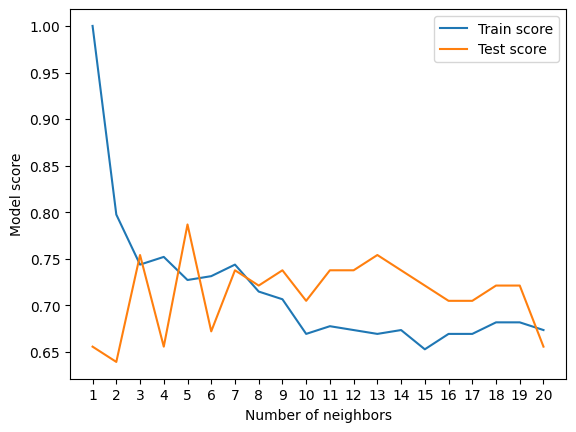

In [39]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")